# MNIST fashion dataset 다중분류

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2024-07-01 12:23:36 +09:00)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import layers

SEED=42

time: 5.5 s (started: 2024-07-01 12:23:37 +09:00)


In [3]:
from keras.datasets import fashion_mnist

(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
X_train.shape,X_test.shape,y_train.shape,y_test.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

time: 4.03 s (started: 2024-07-01 12:23:43 +09:00)


In [4]:
label_names = ['T-shirt/top', 'Trouser',  'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
label_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

time: 0 ns (started: 2024-07-01 12:23:48 +09:00)


## 데이터 확인

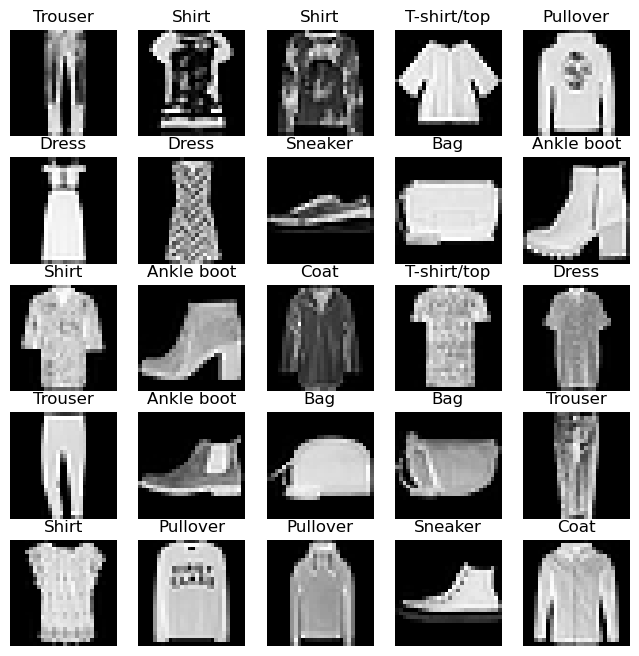

time: 937 ms (started: 2024-07-01 12:23:49 +09:00)


In [5]:
np.random.seed(SEED)
sample = np.random.randint(60000,size=25)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(sample):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(label_names[y_train[idx]])
    plt.axis('off')

In [6]:
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64

time: 16 ms (started: 2024-07-01 12:23:51 +09:00)


In [7]:
## 학습용, 검증용 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=SEED)

time: 765 ms (started: 2024-07-01 12:23:51 +09:00)


In [8]:
X_train.shape,X_val.shape, y_train.shape,y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

time: 0 ns (started: 2024-07-01 12:23:52 +09:00)


## 전처리

In [9]:
# min max scale

X_train_m = X_train/255.0
X_val_m = X_val/255.0
X_test_m = X_test/255.0

time: 140 ms (started: 2024-07-01 12:23:53 +09:00)


In [10]:
X_train_s = X_train_m.reshape(-1,28,28,1)
X_val_s = X_val_m.reshape(-1,28,28,1)
X_test_s = X_test_m.reshape(-1,28,28,1)

X_train_s.shape,X_val_s.shape,X_test_s.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

time: 0 ns (started: 2024-07-01 12:23:53 +09:00)


In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
y_train_o = ohe.fit_transform(y_train.reshape(-1,1))
y_val_o = ohe.transform(y_val.reshape(-1,1))
y_test_o = ohe.transform(y_test.reshape(-1,1))

y_train_o.shape,y_test_o.shape

c:\Users\hyundong\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((48000, 10), (10000, 10))

time: 16 ms (started: 2024-07-01 12:23:54 +09:00)


## 모델

In [12]:
model = keras.Sequential([
    layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='valid',input_shape=(28,28,1),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32,kernel_size=3,strides=1,activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10,activation='softmax'),
])

time: 156 ms (started: 2024-07-01 12:23:55 +09:00)


c:\Users\hyundong\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,666 (518.23 KB)

 Trainable params: 132,666 (518.23 KB)

 Non-trainable params: 0 (0.00 B)

time: 16 ms (started: 2024-07-01 12:23:56 +09:00)


In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

time: 16 ms (started: 2024-07-01 12:23:57 +09:00)


In [15]:
history = model.fit(X_train_s,
          y_train_o,
          epochs=4,
          batch_size=128,
          validation_data=(X_val_s,y_val_o))

Epoch 1/4
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.5305 - loss: 1.2965 - val_accuracy: 0.8234 - val_loss: 0.4977
Epoch 2/4
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7882 - loss: 0.5905 - val_accuracy: 0.8597 - val_loss: 0.4147
Epoch 3/4
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8304 - loss: 0.4911 - val_accuracy: 0.8656 - val_loss: 0.3721
Epoch 4/4
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.8460 - loss: 0.4409 - val_accuracy: 0.8775 - val_loss: 0.3368
time: 30.6 s (started: 2024-07-01 12:23:58 +09:00)


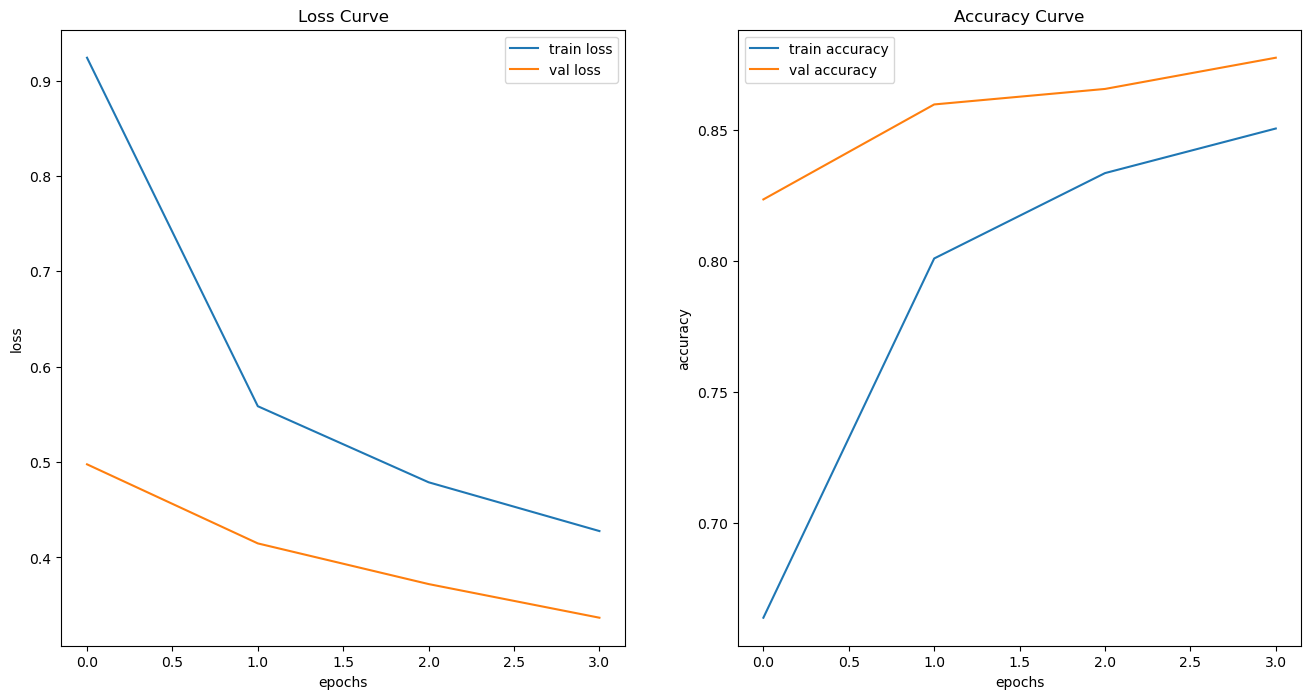

time: 391 ms (started: 2024-07-01 12:24:28 +09:00)


In [16]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()
    
plot_history(history)

In [18]:
y_pred = model.predict(X_test_s)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[4.50872676e-06, 1.62343736e-06, 1.72377656e-06, ...,
        1.19656343e-02, 2.05248330e-06, 9.87392724e-01],
       [4.90407983e-05, 4.90080615e-11, 9.86846745e-01, ...,
        1.01813286e-13, 2.39656259e-07, 4.07244044e-10],
       [2.57464397e-11, 1.00000000e+00, 8.72834303e-13, ...,
        6.59001326e-11, 5.95972322e-20, 9.70815098e-20],
       ...,
       [1.15446073e-05, 8.62346440e-07, 2.15535638e-05, ...,
        2.77021659e-08, 9.99779761e-01, 3.56603806e-07],
       [1.05982538e-08, 9.99998927e-01, 6.53873844e-10, ...,
        1.47126471e-08, 8.79001877e-16, 1.48783010e-15],
       [8.22431815e-04, 9.66048810e-06, 1.65474266e-04, ...,
        4.26655933e-02, 9.80188400e-02, 9.51664872e-04]], dtype=float32)

time: 1.12 s (started: 2024-07-01 12:25:37 +09:00)


In [20]:
# 정확도 출력
y_pred_val = np.argmax(y_pred,axis=1)
y_test_val = np.argmax(y_test_o,axis=1)

time: 0 ns (started: 2024-07-01 12:25:57 +09:00)


accuracy: 0.8779
recall: 0.8779
precision: 0.8773960184631614
f1 : 0.8773548509078847


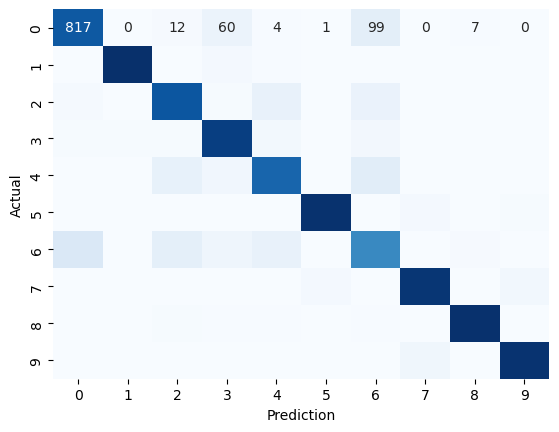

time: 141 ms (started: 2024-07-01 12:25:59 +09:00)


In [21]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred ,average=aver))
    print('precision:', precision_score(y_true, y_pred,average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

print_metrics(y_test_val, y_pred_val, aver='macro')

In [22]:
model.save(filepath='./fashion_4epochs.h5')

time: 78 ms (started: 2024-07-01 12:30:39 +09:00)
